<a href="https://colab.research.google.com/github/juhumkwon/DataMining/blob/main/resnet_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.5401 - loss: 1.2644 - val_accuracy: 0.9173 - val_loss: 0.2660
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9356 - loss: 0.2193 - val_accuracy: 0.9547 - val_loss: 0.1509
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9588 - loss: 0.1398 - val_accuracy: 0.9684 - val_loss: 0.1030
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9667 - loss: 0.1129 - val_accuracy: 0.9779 - val_loss: 0.0686
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9722 - loss: 0.0909 - val_accuracy: 0.9811 - val_loss: 0.0601
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9758 - loss: 0.0806 - val_accuracy: 0.9733 - val_loss: 0.0892
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9804 - loss: 0.0656 - val_accuracy: 0.9786 - val_loss: 0.0677
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9813 - loss: 0.0622 - val

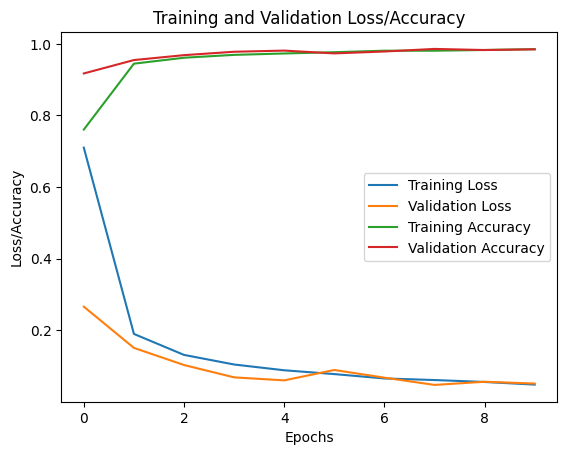

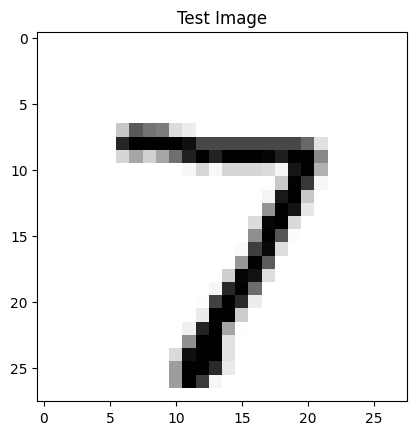

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
predicted_class= [[9.0620927e-11 1.1502913e-07 2.5480672e-08 4.0842707e-07 4.2379406e-10
  1.1189385e-09 1.0952292e-15 9.9999833e-01 4.2737498e-12 1.0683061e-06]]
Predicted Label: 7
True Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Residual Block 정의
def residual_block(inputs, filters):
    x = layers.Conv2D(filters, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.Conv2D(filters, (3, 3), padding="same")(x)
    x = layers.Add()([x, inputs])  # 스킵 연결
    x = layers.ReLU()(x)
    return x

# ResNet 모델 생성 함수
def build_resnet(input_shape, num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # 첫 번째 Conv2D 레이어
    x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)

    # Residual Block 3개 추가
    x = residual_block(x, 32)
    x = residual_block(x, 32)
    x = residual_block(x, 32)

    # 출력 레이어
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

# MNIST 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리 (차원 추가 및 정규화)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# 원-핫 인코딩 적용
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 모델 생성 및 컴파일
model = build_resnet(input_shape=(28, 28, 1), num_classes=10)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 모델 학습
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"테스트 정확도: {test_acc:.4f}")

# 훈련 과정에서의 손실 및 정확도 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# 예측할 이미지 선택
n = 0  # 0번 이미지를 선택
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')
plt.title('Test Image')
plt.show()

# 모델 예측
predicted_class = model.predict(x_test[n].reshape(1, 28, 28, 1))
print("predicted_class=", predicted_class)

"""
predicted_class 배열에서 가장 큰 값의 인덱스를 반환합니다.
왜 [0]가 필요한가?
텐서 형태: tf.argmax(predicted_class, axis=1)의 결과는 일반적으로 배치 차원을 가진 배열 형태입니다.
예를 들어, predicted_class가 하나의 샘플에 대한 예측이라도 tf.argmax의 결과는 [예측값] 형태로 [2] 같은 1차원 배열이 됩니다.
단일 값 추출: numpy()[0]는 이 배열에서 첫 번째 요소(즉, 예측 클래스의 인덱스)를 추출하여, 단일 값(예: 2)으로 만듭니다.
"""
predicted_label = tf.argmax(predicted_class, axis=1).numpy()[0]
print('Predicted Label:', predicted_label)
print('True Label:', y_test[n])
